# <span style="color:red">Santander Customer Satisfaction Project</span>

<a class="anchor" id="0.1"></a>

## **Table of Contents**


 4.	[**Predictive Modeling**](#4)

    4.1 [**Logistic Regression**](#4.1)
    
         4.1.1 [Base Model](#4.1.1)
     
         4.1.2 [Smote Model](#4.1.2)
     
         4.1.3 [Random Under Sampling Model](#4.1.3)
    
    4.2 [**Support Vector Machine**](#4.2)
    
    4.2.1 [Base Model](#4.2.1)
     
     4.2.2 [Smote Model](#4.2.2)
     
     4.2.3 [Random Under Sampling Model](#4.2.3)
    
    4.3 [**Random Forest**](#4.3)
    
    4.3.1 [Base Model](#4.3.1)
     
     4.3.2 [Smote Model](#4.3.2)
     
     4.3.3 [Random Under Sampling Model](#4.3.3)
    
    4.4 [**K Nearest Neighbor**](#4.4)
    
    4.4.1 [Base Model](#4.4.1)
     
     4.4.2 [Smote Model](#4.4.2)
     
     4.4.3 [Random Under Sampling Model](#4.4.3)
    
    4.5 [**Decision Tree Classifier**](#4.5)
    
    4.5.1 [Base Model](#4.5.1)
     
     4.5.2 [Smote Model](#4.5.2)
     
     4.5.3 [Random Under Sampling Model](#4.5.3)
     
    4.6 [**Parameter Tuning**](#4.6)
    
5	[**Conclusion**](#5)

### <span style="color:blue"> Import packages</span>

In [1]:
# Import packages

import pandas as pd
import numpy as np

import warnings 

warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(style="white", color_codes=True)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### <span style="color:blue"> Load Datasets</span>

In [2]:
train = pd.read_csv("X4.csv")

test = pd.read_csv("test.csv") 

train.head()

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36,TARGET
0,23,0,0,0,0,0,3,0,0,0.00,99,0
1,34,0,0,0,1,1,6,3,0,300.00,3,0
2,23,1,0,0,0,1,3,3,3,3.00,99,0
3,37,1,0,0,0,1,3,3,3,70.62,2,0
4,39,0,0,1,0,1,6,3,3,135003.00,1,0


In [3]:
test_id = test['ID']

test = test.drop(columns=['ID'])

In [4]:
col_names = train.columns.to_list()
col_names[:-1]

['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var12_0',
 'ind_var13_0',
 'ind_var30',
 'num_var30_0',
 'num_var30',
 'num_var42',
 'saldo_var30',
 'var36']

In [5]:
a = test[col_names[:-1]]
a.head()

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36
0,32,1,0,0,0,1,3,3,3,6.0,3
1,35,1,0,0,0,1,3,3,3,3.0,3
2,23,1,0,0,0,1,3,3,3,30.0,3
3,24,0,0,0,0,0,3,0,0,0.0,99
4,23,1,0,0,0,1,3,3,3,30.0,3


In [6]:
train.shape, a.shape

((76020, 12), (75818, 11))

### <span style="color:blue"> Check Target Column</span>

In [7]:
# happy customers have TARGET = 0, unhappy custormers have TARGET = 1

df = pd.DataFrame(train.TARGET.value_counts())

df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


A little less then 4% are unhappy . This is an unbalanced dataset

In [8]:
# Define X and y

X = train.iloc[:,:-1]
y = train.TARGET

# <span style="color:red">**4. Predictive Modelling**</span> <a class="anchor" id="4">

Jump to [Table of Contents](#0.1)

In [9]:
# IMPORT SKLEARN PACKAGES 

# IMPORT PREPROCESSING
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import datasets
from sklearn import linear_model

from sklearn.feature_selection import RFE, SelectFromModel

# IMPORT CLASSIFIER MODELS

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.svm import SVC, LinearSVC

from sklearn.ensemble import RandomForestClassifier

# IMPORT METRICS
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

# SAMPLING MODELS
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# IMPORT DECOMPOSITION
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from collections import Counter
import time
import random

from sklearn.pipeline import Pipeline

In [10]:
# Our new dataframe with our new selected features

X.head()

,var15,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var30,num_var30_0,num_var30,num_var42,saldo_var30,var36
0,23,0,0,0,0,0,3,0,0,0.00,99
1,34,0,0,0,1,1,6,3,0,300.00,3
2,23,1,0,0,0,1,3,3,3,3.00,99
3,37,1,0,0,0,1,3,3,3,70.62,2
4,39,0,0,1,0,1,6,3,3,135003.00,1


In [11]:
""" A function to plot Confusion Matrix """

def plot_confusion_matrix(y, predictions, model_name, cmap='Purples', cbar=False):
    
    cm    = confusion_matrix(y, predictions)
    
    cm_df = pd.DataFrame(cm)
    
    labels = ['True Neg','False Pos','False Neg','True Pos']
              
    categories = ['Zero', 'One']

    fig, ax = plt.subplots(figsize=(7, 7))
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    bottom, top = ax.get_ylim()
    _ = ax.set_ylim(bottom + 0.5, top - 0.5)

    plt.ylabel("Actual", fontweight='bold', fontsize=15)
    plt.xlabel("Predicted", fontweight='bold', fontsize=15)
    
    ax.set_xticklabels(["Satisfied(0)", "Unsatisfied(1)"], fontsize=13)
    ax.set_yticklabels(["Satisfied(0)", "Unsatisfied(1)"], fontsize=13)
    
    plt.title("Confusion Matrix for {} - Counts".format(model_name),fontweight='bold', fontsize=15,pad=20)
    plt.show()

In [12]:
""" A function to plot ROC curve and calculate AUC"""

def AUC_and_plot_ROC(model, X_test, y_test):
    
    probs = model.predict_proba(X_test)

    preds = probs[:,1]

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)

    AUC = auc(false_positive_rate, true_positive_rate)

    # plot the roc curve for the model

    plt.title("")

    plt.plot(false_positive_rate, true_positive_rate, 'b', linestyle='--', label='AUC = %0.2f'% AUC)
    
    plt.plot([0,1],[0,1],'r--')

    plt.legend(loc='upper left')

    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
   
    return AUC

In [13]:
""" A function to calculate specificity from confusion matrix """

def specificity(y_test, y_pred):
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    return tn/(tn+fp)

In [14]:
""" A function to print confusion matrix and Classification report"""

def con_matrix_and_clas_report(y_test, y_pred):
    
    print("Confusion Matrix: \n", confusion_matrix(y_test, pred))

    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

    print("\nTrue negative: ",tn, "False positive: ",fp,"False negative: ",fn, "True positive: ",tp)

    print("\nSpecificity: ",specificity(y_test, pred))

    print("\nClassification report: \n \n", classification_report(y_test, pred))

In [15]:
# split test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <span style="color:red">**4.1 Logistic Regression**</span> <a class="anchor" id="4.1"></a>

## <span style="color:red">4.1.1 Logistic Regression Base Model</span> <a class="anchor" id="4.1.1"></a>

In [16]:
# Training and preidiction

start = time.process_time()

model = LogisticRegression().fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  2.42 secs


Confusion Matrix: 
 [[14525    72]
 [  607     0]]

True negative:  14525 False positive:  72 False negative:  607 True positive:  0

Specificity:  0.9950674796190998

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14597
           1       0.00      0.00      0.00       607

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



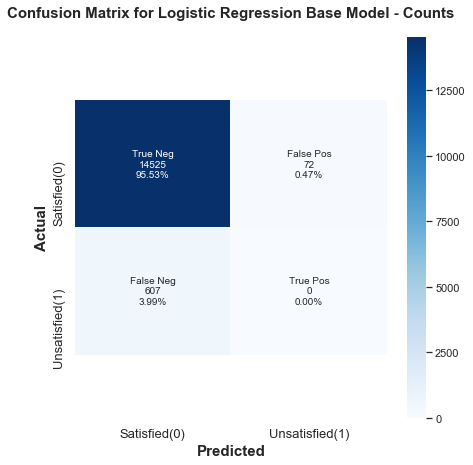

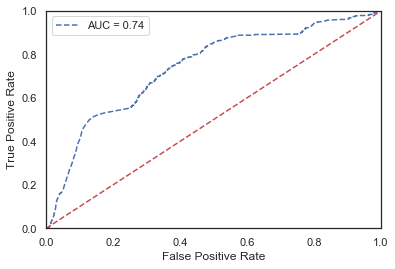

In [17]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Logistic Regression Base Model', cmap='Purples', cbar=False)
AUC_LR_Base = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">*General Sampling Methods*</span>

. Naive RandomOverSampler

. Over Sampling Smote

. Under Sampling ClusterCentroids

. Under Sampling RandomUnderSampler

### <span style="color:blue"> Remember Original Data Frame</span>

In [18]:
# happy customers have TARGET = 0, unhappy custormers have TARGET = 1

df = pd.DataFrame(train.TARGET.value_counts())

df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


### <span style="color:blue"> Investigate y_train</span>

In [19]:
# Investigate y_train

df = pd.DataFrame(y_train.value_counts())

df['Percentage'] = 100*df['TARGET']/df.TARGET.sum()
df

,TARGET,Percentage
0,58415,96.052026
1,2401,3.947974


This is an unbalanced dataset, so we have to consider it during training

## <span style="color:red">4.1.2 Logistic Regression Random Over Sampling Model</span> <a class="anchor" id="4.1.2"></a>

In [20]:
# Naive Random Over Sampler

X_resampled_ros, y_resampled_ros = RandomOverSampler(random_state=0).fit_resample(X_train,y_train)

df1 = pd.DataFrame(y_resampled_ros)

df2 = pd.DataFrame(df1.TARGET.value_counts())
print('created dataframe shape: ',df1.shape)

df2['Percentage'] = 100*df2['TARGET']/df1.shape[0]
df2

created dataframe shape:  (116830, 1)


,TARGET,Percentage
1,58415,50.0
0,58415,50.0


In [21]:
start = time.process_time()

model = LogisticRegression().fit(X_resampled_ros, y_resampled_ros)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  2.41 secs


Confusion Matrix: 
 [[9782 4815]
 [ 194  413]]

True negative:  9782 False positive:  4815 False negative:  194 True positive:  413

Specificity:  0.6701376995273002

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     14597
           1       0.08      0.68      0.14       607

    accuracy                           0.67     15204
   macro avg       0.53      0.68      0.47     15204
weighted avg       0.94      0.67      0.77     15204



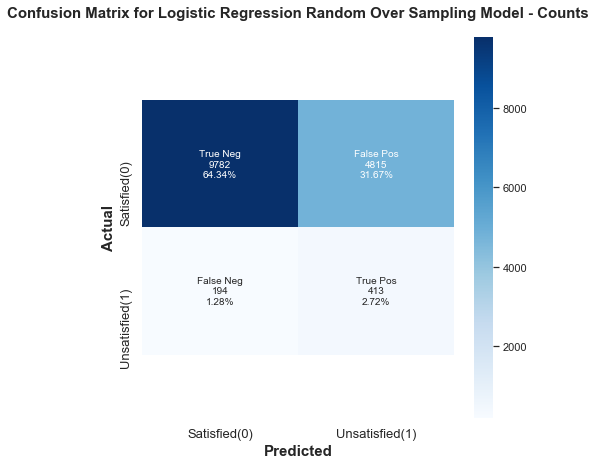

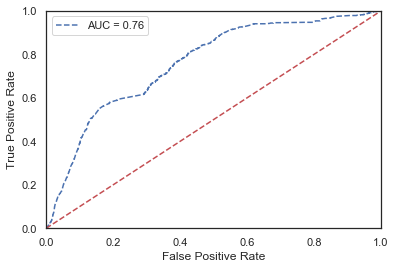

In [22]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Logistic Regression Random Over Sampling Model', cmap='Purples', cbar=False)
AUC = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.1.3 Logistic Regression Smote Over Sampling Model</span> <a class="anchor" id="4.1.3"></a>

In [23]:
# Over Sampling Smote

X_resampled_smote, y_resampled_smote = SMOTE(random_state=0).fit_resample(X_train,y_train)

df1 = pd.DataFrame(y_resampled_smote)

df2 = pd.DataFrame(df1.TARGET.value_counts())

df2['Percentage'] = 100*df2['TARGET']/df1.shape[0]
df2

,TARGET,Percentage
1,58415,50.0
0,58415,50.0


In [24]:
start = time.process_time()

model = LogisticRegression().fit(X_resampled_smote, y_resampled_smote)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  2.35 secs


Confusion Matrix: 
 [[9772 4825]
 [ 194  413]]

True negative:  9772 False positive:  4825 False negative:  194 True positive:  413

Specificity:  0.6694526272521751

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     14597
           1       0.08      0.68      0.14       607

    accuracy                           0.67     15204
   macro avg       0.53      0.67      0.47     15204
weighted avg       0.94      0.67      0.77     15204



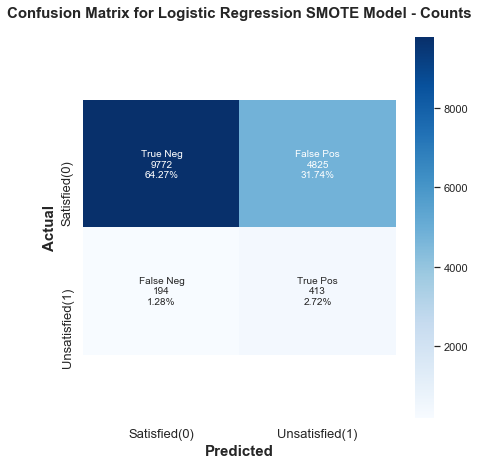

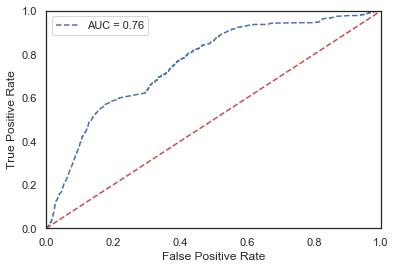

In [25]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Logistic Regression SMOTE Model', cmap='Purples', cbar=False)
AUC_LR_Smote = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.1.4 Logistic Regression Random Under Sampling Model</span><a class="anchor" id="4.1.4"></a>

In [26]:
# RandomUnderSampler

X_resampled_rus, y_resampled_rus = RandomUnderSampler(random_state=0).fit_resample(X_train,y_train)

df1 = pd.DataFrame(y_resampled_rus)
df2 = pd.DataFrame(df1.TARGET.value_counts())

df2['Percentage'] = 100*df2['TARGET']/df1.shape[0]
df2

,TARGET,Percentage
1,2401,50.0
0,2401,50.0


In [27]:
start = time.process_time()

model = LogisticRegression().fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  0.20 secs


Confusion Matrix: 
 [[9843 4754]
 [ 199  408]]

True negative:  9843 False positive:  4754 False negative:  199 True positive:  408

Specificity:  0.6743166404055628

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.67      0.80     14597
           1       0.08      0.67      0.14       607

    accuracy                           0.67     15204
   macro avg       0.53      0.67      0.47     15204
weighted avg       0.94      0.67      0.77     15204



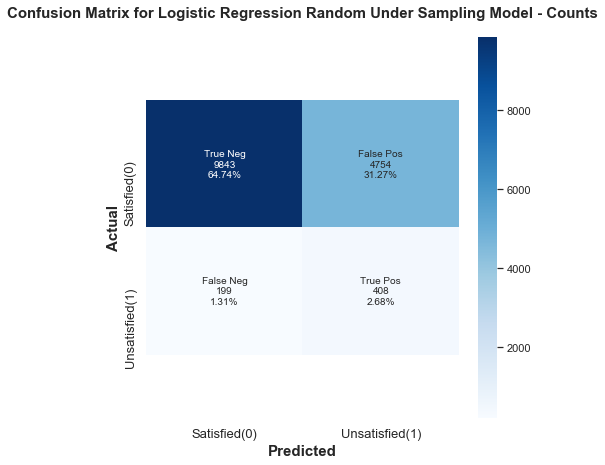

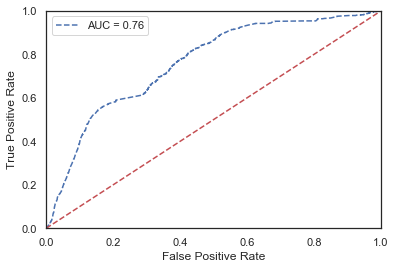

In [28]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Logistic Regression Random Under Sampling Model', cmap='Purples', cbar=False)
AUC_LR_rus = AUC_and_plot_ROC(model, X_test, y_test)

# <span style="color:red">**4.2 Support Vector Machine**</span> <a class="anchor" id="4.2"></a>

## <span style="color:red">4.2.1 SVM Base Model</span> <a class="anchor" id="4.2.1"></a>

In [29]:
start = time.process_time()

model = svm.SVC(probability=True).fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  250.37 secs


Confusion Matrix: 
 [[14597     0]
 [  607     0]]

True negative:  14597 False positive:  0 False negative:  607 True positive:  0

Specificity:  1.0

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14597
           1       0.00      0.00      0.00       607

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



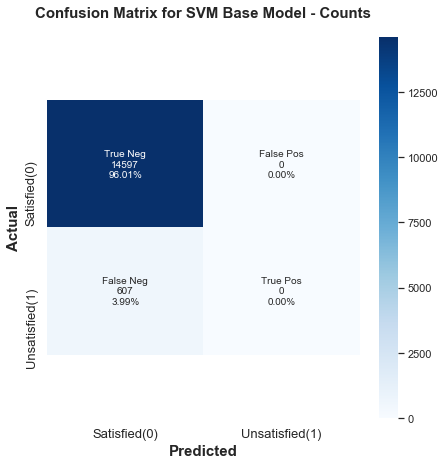

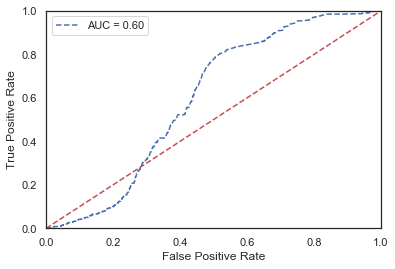

In [30]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'SVM Base Model', cmap='Purples', cbar=False)
AUC_SVM_Base = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.2.2 SVM Smote Over Sampling Model</span> <a class="anchor" id="4.2.2"></a>

In [31]:
start = time.process_time()

model = svm.SVC().fit(X_resampled_smote, y_resampled_smote)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  2186.66 secs


Confusion Matrix: 
 [[ 2117 12480]
 [   26   581]]

True negative:  2117 False positive:  12480 False negative:  26 True positive:  581

Specificity:  0.14502980064396795

Classification report: 
 
               precision    recall  f1-score   support

           0       0.99      0.15      0.25     14597
           1       0.04      0.96      0.09       607

    accuracy                           0.18     15204
   macro avg       0.52      0.55      0.17     15204
weighted avg       0.95      0.18      0.25     15204



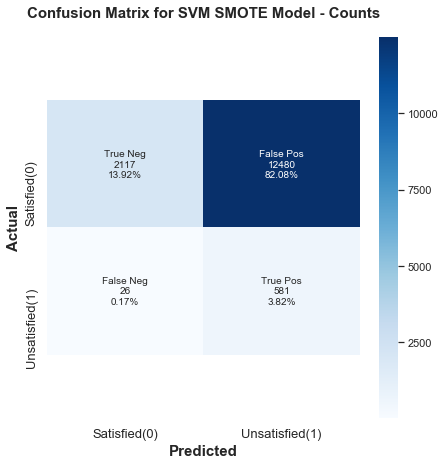

In [32]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'SVM SMOTE Model', cmap='Purples', cbar=False)
#AUC_SVM_Smote = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.2.3 SVM Random Under Sampling Model</span> <a class="anchor" id="4.2.3"></a>

In [33]:
# RandomUnderSampler

start = time.process_time()

model = svm.SVC(probability=True).fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  11.40 secs


Confusion Matrix: 
 [[ 1778 12819]
 [   17   590]]

True negative:  1778 False positive:  12819 False negative:  17 True positive:  590

Specificity:  0.12180585051722957

Classification report: 
 
               precision    recall  f1-score   support

           0       0.99      0.12      0.22     14597
           1       0.04      0.97      0.08       607

    accuracy                           0.16     15204
   macro avg       0.52      0.55      0.15     15204
weighted avg       0.95      0.16      0.21     15204



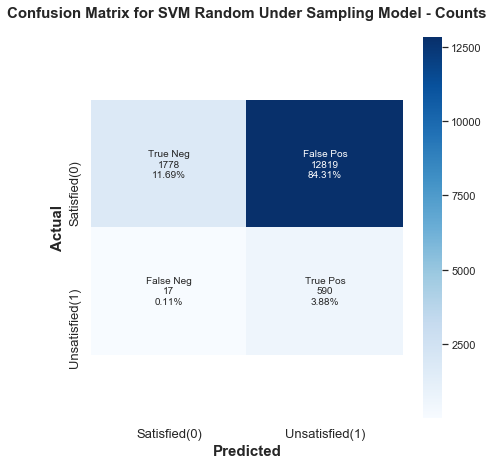

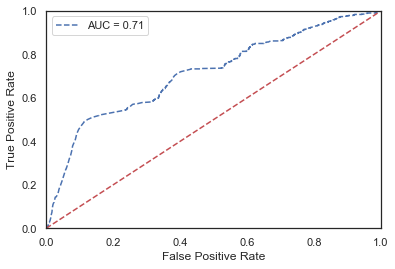

In [34]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'SVM Random Under Sampling Model', cmap='Purples', cbar=False)
AUC_SVM_rus = AUC_and_plot_ROC(model, X_test, y_test)

# <span style="color:red">**4.3 Random Forest**</span> <a class="anchor" id="4.3"></a>

## <span style="color:red">4.3.1 RF Base Model</span> <a class="anchor" id="4.3.1"></a>

In [35]:
start = time.process_time()

model = RandomForestClassifier().fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  8.41 secs


Confusion Matrix: 
 [[14562    35]
 [  596    11]]

True negative:  14562 False positive:  35 False negative:  596 True positive:  11

Specificity:  0.9976022470370625

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14597
           1       0.24      0.02      0.03       607

    accuracy                           0.96     15204
   macro avg       0.60      0.51      0.51     15204
weighted avg       0.93      0.96      0.94     15204



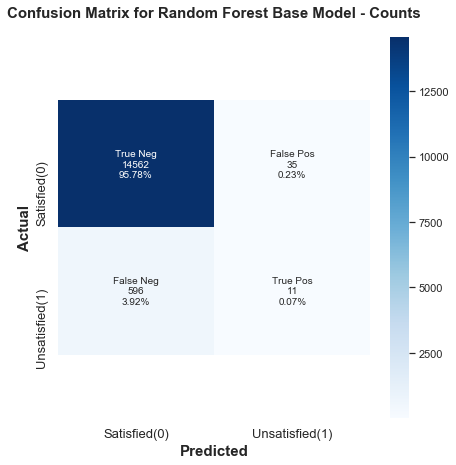

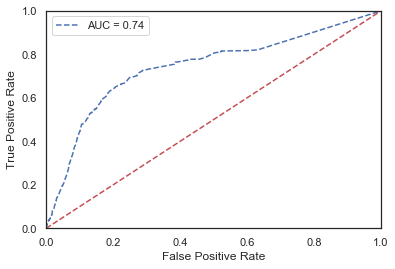

In [36]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Random Forest Base Model', cmap='Purples', cbar=False)
AUC_RF_Base = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.3.2 RF Smote Over Sampling Model</span> <a class="anchor" id="4.3.2"></a>

In [37]:
# Over Sampling Smote

#X_resampled_smote, y_resampled_smote = SMOTE(random_state=0).fit_resample(X_train,y_train)

In [38]:
X_resampled_smote.shape

(116830, 11)

In [39]:
start = time.process_time()

model = RandomForestClassifier().fit(X_resampled_smote, y_resampled_smote)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  18.92 secs


Confusion Matrix: 
 [[11938  2659]
 [  250   357]]

True negative:  11938 False positive:  2659 False negative:  250 True positive:  357

Specificity:  0.8178392820442557

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     14597
           1       0.12      0.59      0.20       607

    accuracy                           0.81     15204
   macro avg       0.55      0.70      0.54     15204
weighted avg       0.95      0.81      0.86     15204



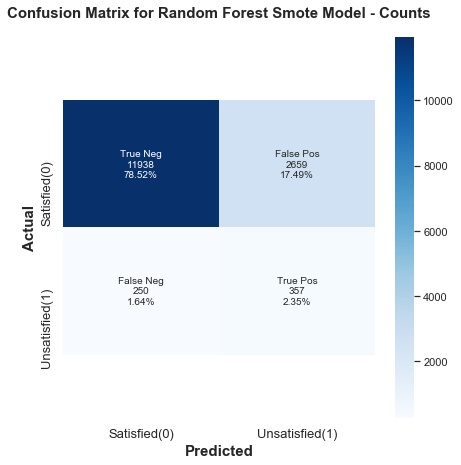

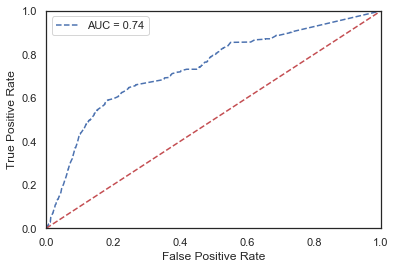

In [40]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Random Forest Smote Model', cmap='Purples', cbar=False)
AUC_RF_Smote = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.3.3 RF Under Sampling Model</span> <a class="anchor" id="4.3.3"></a>

In [41]:
# RandomUnderSampler

#X_resampled_rus, y_resampled_rus = RandomUnderSampler(random_state=0).fit_resample(X_train,y_train)

start = time.process_time()

model = RandomForestClassifier().fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  0.83 secs


Confusion Matrix: 
 [[11064  3533]
 [  181   426]]

True negative:  11064 False positive:  3533 False negative:  181 True positive:  426

Specificity:  0.7579639651983284

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.76      0.86     14597
           1       0.11      0.70      0.19       607

    accuracy                           0.76     15204
   macro avg       0.55      0.73      0.52     15204
weighted avg       0.95      0.76      0.83     15204



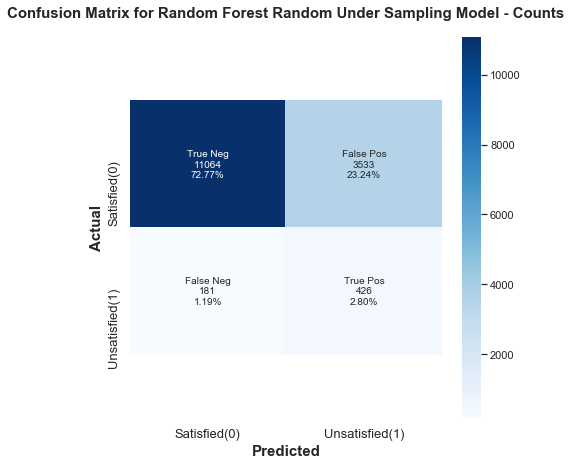

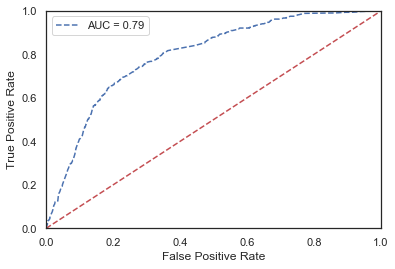

In [42]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Random Forest Random Under Sampling Model', cmap='Purples', cbar=False)
AUC_RF_rus = AUC_and_plot_ROC(model, X_test, y_test)

# <span style="color:red">**4.4 K Nearest Neighbor**</span> <a class="anchor" id="4.4"></a>

## <span style="color:red">4.4.1 kNN Base Model</span> <a class="anchor" id="4.4.1"></a>

In [43]:
start = time.process_time()

model = KNeighborsClassifier().fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs \n')

pred = model.predict(X_test)

Time elapsed :  3.23 secs 



Confusion Matrix: 
 [[14502    95]
 [  584    23]]

True negative:  14502 False positive:  95 False negative:  584 True positive:  23

Specificity:  0.9934918133863122

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     14597
           1       0.19      0.04      0.06       607

    accuracy                           0.96     15204
   macro avg       0.58      0.52      0.52     15204
weighted avg       0.93      0.96      0.94     15204



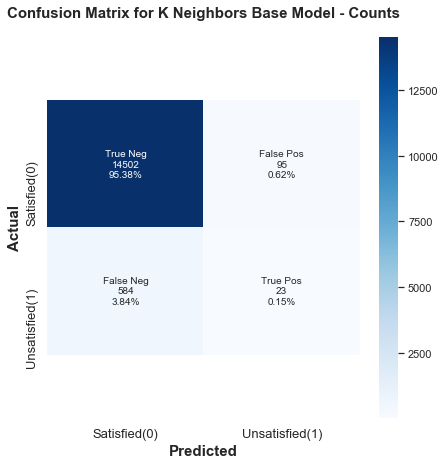

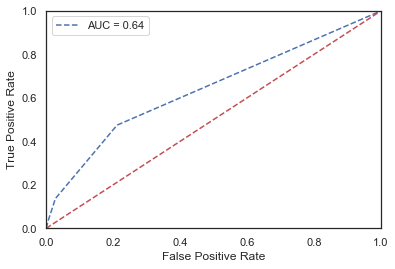

In [44]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'K Neighbors Base Model', cmap='Purples', cbar=False)
AUC_knn_Base = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.3.2 kNN Smote Over Sampling Model</span> <a class="anchor" id="4.3.2"></a>

In [45]:
start = time.process_time()

model = KNeighborsClassifier().fit(X_resampled_smote, y_resampled_smote)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  26.15 secs


Confusion Matrix: 
 [[12848  1749]
 [  466   141]]

True negative:  12848 False positive:  1749 False negative:  466 True positive:  141

Specificity:  0.880180859080633

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92     14597
           1       0.07      0.23      0.11       607

    accuracy                           0.85     15204
   macro avg       0.52      0.56      0.52     15204
weighted avg       0.93      0.85      0.89     15204



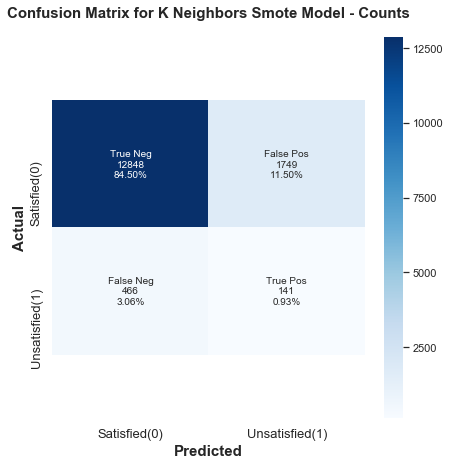

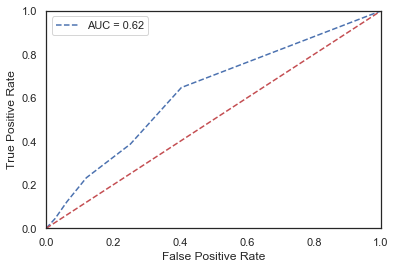

In [46]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'K Neighbors Smote Model', cmap='Purples', cbar=False)
AUC_knn_Smote = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.3.3 kNN Under Sampling Model</span> <a class="anchor" id="4.3.3"></a>

In [47]:
# RandomUnderSampler

start = time.process_time()

model = KNeighborsClassifier().fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  0.03 secs


Confusion Matrix: 
 [[12225  2372]
 [  413   194]]

True negative:  12225 False positive:  2372 False negative:  413 True positive:  194

Specificity:  0.8375008563403439

Classification report: 
 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90     14597
           1       0.08      0.32      0.12       607

    accuracy                           0.82     15204
   macro avg       0.52      0.58      0.51     15204
weighted avg       0.93      0.82      0.87     15204



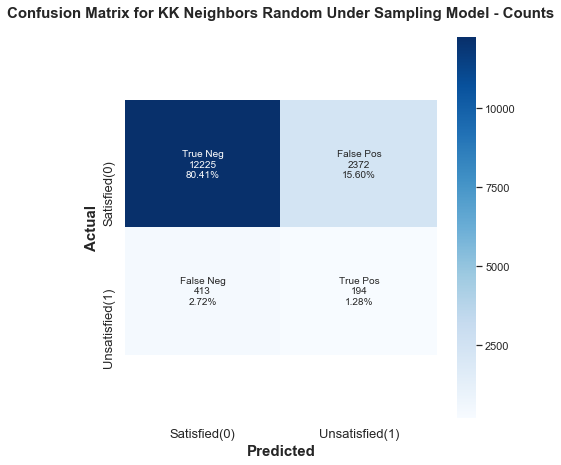

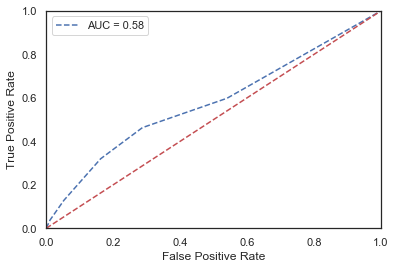

In [48]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'KK Neighbors Random Under Sampling Model', cmap='Purples', cbar=False)
AUC_knn_rus = AUC_and_plot_ROC(model, X_test, y_test)

# <span style="color:red">**4.5 Decision Tree Classifier**</span> <a class="anchor" id="4.5"></a>

## <span style="color:red">4.5.1 DT Base Model</span> <a class="anchor" id="4.5.1"></a>

In [49]:
start = time.process_time()

model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  0.14 secs


Confusion Matrix: 
 [[14596     1]
 [  607     0]]

True negative:  14596 False positive:  1 False negative:  607 True positive:  0

Specificity:  0.9999314927724875

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14597
           1       0.00      0.00      0.00       607

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



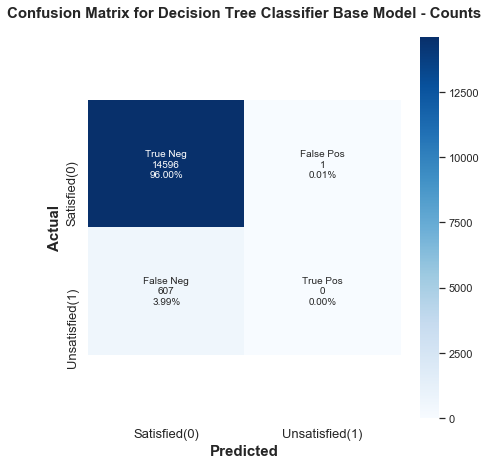

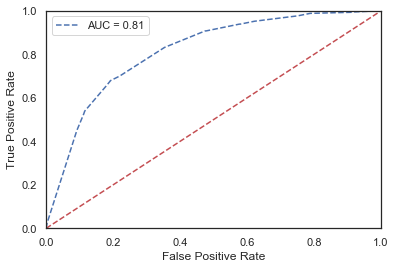

In [50]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier Base Model', cmap='Purples', cbar=False)
AUC_dt_base = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.5.2 DT Smote Over Sampling Model</span> <a class="anchor" id="4.5.2"></a>

In [51]:
start = time.process_time()

model = DecisionTreeClassifier(max_depth=5).fit(X_resampled_smote, y_resampled_smote)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  0.30 secs


Confusion Matrix: 
 [[10126  4471]
 [  135   472]]

True negative:  10126 False positive:  4471 False negative:  135 True positive:  472

Specificity:  0.693704185791601

Classification report: 
 
               precision    recall  f1-score   support

           0       0.99      0.69      0.81     14597
           1       0.10      0.78      0.17       607

    accuracy                           0.70     15204
   macro avg       0.54      0.74      0.49     15204
weighted avg       0.95      0.70      0.79     15204



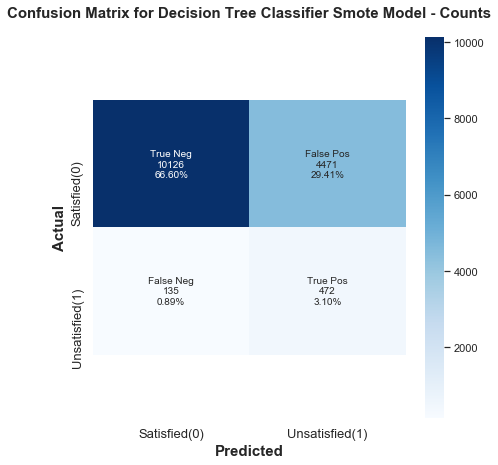

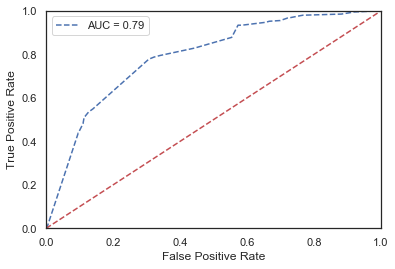

In [52]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier Smote Model', cmap='Purples', cbar=False)
AUC_dt_Smote = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">4.5.3 DT Under Sampling Model</span> <a class="anchor" id="4.5.3"></a>

In [53]:
# RandomUnderSampler

start = time.process_time()

model = DecisionTreeClassifier(max_depth=5).fit(X_resampled_rus, y_resampled_rus)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  0.02 secs


Confusion Matrix: 
 [[11675  2922]
 [  191   416]]

True negative:  11675 False positive:  2922 False negative:  191 True positive:  416

Specificity:  0.7998218812084675

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     14597
           1       0.12      0.69      0.21       607

    accuracy                           0.80     15204
   macro avg       0.55      0.74      0.55     15204
weighted avg       0.95      0.80      0.86     15204



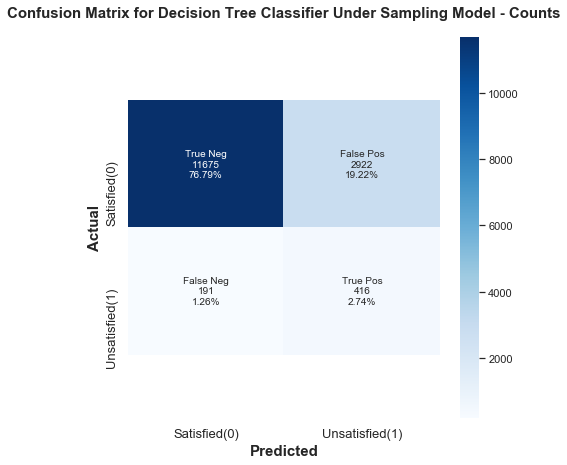

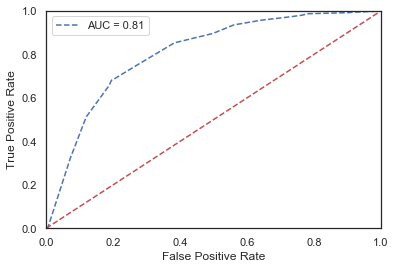

In [54]:
con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier Under Sampling Model', cmap='Purples', cbar=False)
AUC_dt_rus = AUC_and_plot_ROC(model, X_test, y_test)

In [55]:
weighted_avg_dict = {'Model_name':           ['LR', 'SVM', 'RF', 'kNN', 'DT'],
                     'Base_Model':           [0.94, 0.94, 0.94, 0.94, 0.94], 
                     'Smote_Model':          [0.77, 0.25, 0.86, 0.89, 0.79], 
                     'Under_Sampling_Model': [0.77, 0.21, 0.83, 0.87, 0.86]}
weighted_avg_df = pd.DataFrame.from_dict(weighted_avg_dict)
weighted_avg_df

,Model_name,Base_Model,Smote_Model,Under_Sampling_Model
0,LR,0.94,0.77,0.77
1,SVM,0.94,0.25,0.21
2,RF,0.94,0.86,0.83
3,kNN,0.94,0.89,0.87
4,DT,0.94,0.79,0.86


In [56]:
recall_1_dict = {'Model_name':           ['LR', 'SVM', 'RF', 'kNN', 'DT'],
                 'Base_Model':           [0, 0, 0.02, 0.04, 0], 
                 'Smote_Model':          [0.68, 0.96, 0.59, 0.23, 0.78], 
                 'Under_Sampling_Model': [0.67, 0.97, 0.71, 0.32, 0.69]}

recall_1_df = pd.DataFrame.from_dict(recall_1_dict)
recall_1_df

,Model_name,Base_Model,Smote_Model,Under_Sampling_Model
0,LR,0.00,0.68,0.67
1,SVM,0.00,0.96,0.97
2,RF,0.02,0.59,0.71
3,kNN,0.04,0.23,0.32
4,DT,0.00,0.78,0.69


In [57]:
AUC_dict = {'Model_name':           ['LR', 'SVM', 'RF', 'kNN', 'DT'],
            'Base_Model':           [0.74, 0.60, 0.74, 0.64, 0.82], 
            'Smote_Model':          [0.76, 0.60, 0.74, 0.62, 0.79], 
            'Under_Sampling_Model': [0.76, 0.71, 0.79, 0.58, 0.81]}

AUC_df = pd.DataFrame.from_dict(AUC_dict)
AUC_df

,Model_name,Base_Model,Smote_Model,Under_Sampling_Model
0,LR,0.74,0.76,0.76
1,SVM,0.60,0.60,0.71
2,RF,0.74,0.74,0.79
3,kNN,0.64,0.62,0.58
4,DT,0.82,0.79,0.81


## By looking this table I decided that DT is the best model for me. Now I will do fine parameter tuning

## <span style="color:red">4.6 Parameter Tuning for DT</span> <a class="anchor" id="4.6"></a>

## <span style="color:red">DT Base Model</span>

In [58]:
start = time.process_time()

model = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

print(f'Time elapsed : {time.process_time() - start : 2.2f} secs')

pred = model.predict(X_test)

Time elapsed :  0.30 secs


Confusion Matrix: 
 [[14468   129]
 [  590    17]]

True negative:  14468 False positive:  129 False negative:  590 True positive:  17

Specificity:  0.9911625676508872

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     14597
           1       0.12      0.03      0.05       607

    accuracy                           0.95     15204
   macro avg       0.54      0.51      0.51     15204
weighted avg       0.93      0.95      0.94     15204



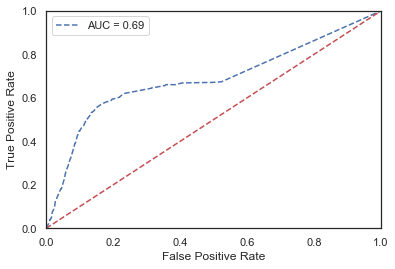

In [59]:
con_matrix_and_clas_report(y_test, pred)
#plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier Base Model', cmap='Purples', cbar=False)
AUC_dt_base = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">Grid Search For Base Model</span>

In [60]:
print()
print(format('How to optimize hyper-parameters of a DT model using Grid Search in Python','*^82'))


****How to optimize hyper-parameters of a DT model using Grid Search in Python****


In [61]:
# Create a dictionary of all the parameter options 

parameters = {'max_leaf_nodes': list(range(2, 100)),
              'min_samples_split': [2, 3, 4],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8]
             }

# Create a grid search object

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              parameters,
                              verbose=1,
                              cv=5,
                              n_jobs = -1
                              )

In [62]:
# Fit the grid search

grid_search_cv.fit(X_train,y_train)

Fitting 5 folds for each of 2352 candidates, totalling 11760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [63]:
# View The Best Parameters
print('Best Criterion:', grid_search_cv.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_search_cv.best_estimator_.get_params()['max_depth'])
print('Best max leaf nodes:', grid_search_cv.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min samples split:', grid_search_cv.best_estimator_.get_params()['min_samples_split'])

Best Criterion: gini
Best max_depth: 6
Best max leaf nodes: 14
Best min samples split: 2


Confusion Matrix: 
 [[14597     0]
 [  607     0]]

True negative:  14597 False positive:  0 False negative:  607 True positive:  0

Specificity:  1.0

Classification report: 
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     14597
           1       0.00      0.00      0.00       607

    accuracy                           0.96     15204
   macro avg       0.48      0.50      0.49     15204
weighted avg       0.92      0.96      0.94     15204



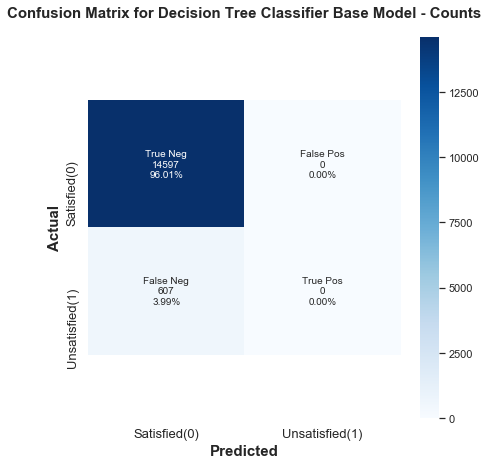

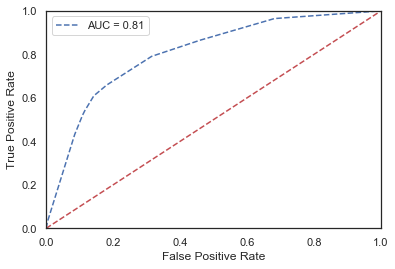

In [64]:
# train the model with the best known parameters

best_dt_model = DecisionTreeClassifier(
                                       criterion= 'gini', 
                                       max_depth= 6, 
                                       max_leaf_nodes= 14, 
                                       min_samples_split= 2, 
                                       random_state = 42, 
                                       )

best_dt_model.fit(X_train,y_train)

pred = best_dt_model.predict(X_test)

con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier Base Model', cmap='Purples', cbar=False)
AUC_dt_base = AUC_and_plot_ROC(best_dt_model, X_test, y_test)

## <span style="color:red">Smote Model</span>

In [65]:
# Over Sampling Smote

X_resampled_smote, y_resampled_smote = SMOTE(random_state=0).fit_resample(X_train,y_train)

Confusion Matrix: 
 [[11951  2646]
 [  253   354]]

True negative:  11951 False positive:  2646 False negative:  253 True positive:  354

Specificity:  0.8187298760019182

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     14597
           1       0.12      0.58      0.20       607

    accuracy                           0.81     15204
   macro avg       0.55      0.70      0.54     15204
weighted avg       0.94      0.81      0.86     15204



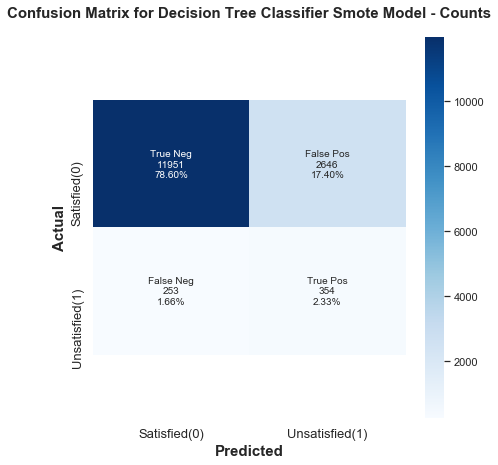

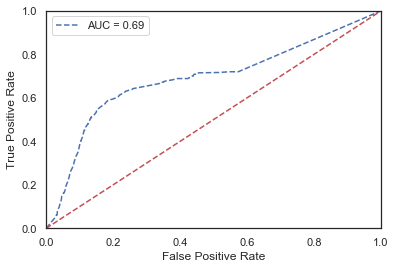

In [66]:
model = DecisionTreeClassifier(random_state = 42).fit(X_resampled_smote, y_resampled_smote)

pred = model.predict(X_test)

con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier Smote Model', cmap='Purples', cbar=False)
AUC_dt_smote = AUC_and_plot_ROC(model, X_test, y_test)

In [67]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

## <span style="color:red">Grid Search For Smote Model</span>

In [68]:
# Create a dictionary of all the parameter options 

parameters = {'max_leaf_nodes': list(range(2, 100)),
              'min_samples_split': [2, 3, 4],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8]
             }

# Create a grid search object

grid_search_cv_smote = GridSearchCV(
                                    DecisionTreeClassifier(random_state=42),
                                    parameters,
                                    verbose=1,
                                    cv=5,
                                    n_jobs = -1
                                   )

In [69]:
# Fit the grid search

grid_search_cv_smote.fit(X_resampled_smote, y_resampled_smote)

Fitting 5 folds for each of 2352 candidates, totalling 11760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [70]:
# View The Best Parameters

print('Best Criterion:', grid_search_cv_smote.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_search_cv_smote.best_estimator_.get_params()['max_depth'])
print('Best max leaf nodes:', grid_search_cv_smote.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min samples split:', grid_search_cv_smote.best_estimator_.get_params()['min_samples_split'])

Best Criterion: gini
Best max_depth: 8
Best max leaf nodes: 97
Best min samples split: 2


Confusion Matrix: 
 [[11674  2923]
 [  206   401]]

True negative:  11674 False positive:  2923 False negative:  206 True positive:  401

Specificity:  0.799753373980955

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     14597
           1       0.12      0.66      0.20       607

    accuracy                           0.79     15204
   macro avg       0.55      0.73      0.54     15204
weighted avg       0.95      0.79      0.85     15204



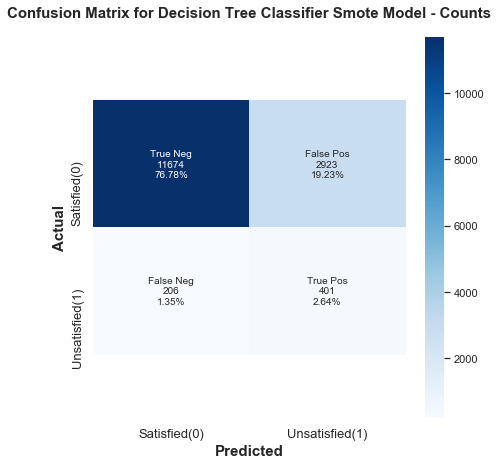

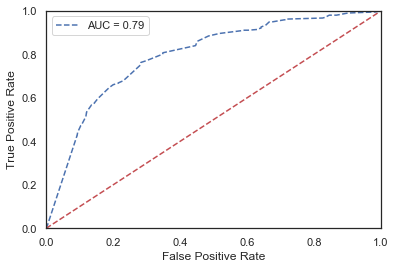

In [71]:
#Train the model with best parameters

best_dt_model_smote = DecisionTreeClassifier(
                                       criterion= grid_search_cv_smote.best_estimator_.get_params()['criterion'], 
                                       max_depth= grid_search_cv_smote.best_estimator_.get_params()['max_depth'], 
                                       max_leaf_nodes= grid_search_cv_smote.best_estimator_.get_params()['max_leaf_nodes'], 
                                       min_samples_split= grid_search_cv_smote.best_estimator_.get_params()['min_samples_split'], 
                                       random_state = 42, 
                                       )

best_dt_model_smote.fit(X_resampled_smote, y_resampled_smote)

pred = best_dt_model_smote.predict(X_test)

con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier Smote Model', cmap='Purples', cbar=False)
AUC_dt_smote = AUC_and_plot_ROC(best_dt_model_smote, X_test, y_test)

In [72]:
#best_dt_model_smote.get_params()

## <span style="color:red">Random Under Sampling Model</span>

In [73]:
X_resampled_rus, y_resampled_rus = RandomUnderSampler(random_state=0).fit_resample(X_train,y_train)

Confusion Matrix: 
 [[10853  3744]
 [  197   410]]

True negative:  10853 False positive:  3744 False negative:  197 True positive:  410

Specificity:  0.7435089401931904

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.74      0.85     14597
           1       0.10      0.68      0.17       607

    accuracy                           0.74     15204
   macro avg       0.54      0.71      0.51     15204
weighted avg       0.95      0.74      0.82     15204



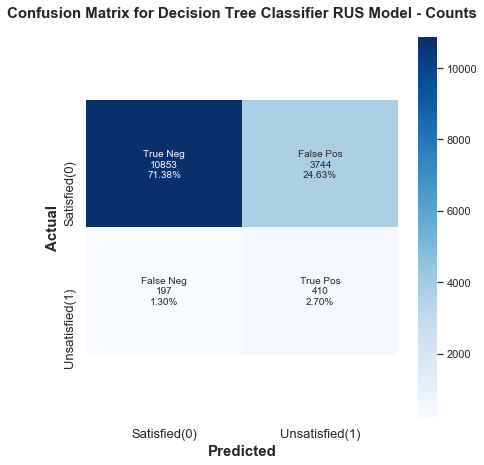

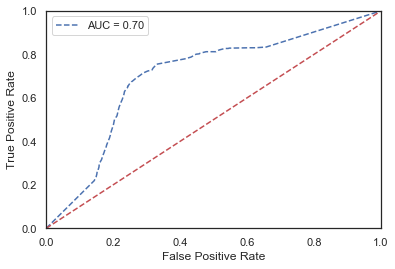

In [74]:
model = DecisionTreeClassifier(random_state=0)

model.fit(X_resampled_rus, y_resampled_rus)

pred = model.predict(X_test)

con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier RUS Model', cmap='Purples', cbar=False)
AUC_dt_rus = AUC_and_plot_ROC(model, X_test, y_test)

## <span style="color:red">Grid Search For Random Under Sampling Model</span>

In [75]:
# Create a dictionary of all the parameter options 

parameters = {'max_leaf_nodes': list(range(2, 100)),
              'min_samples_split': [2, 3, 4],
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8]
             }

# Create a grid search object

grid_search_cv_rus = GridSearchCV(
                                    DecisionTreeClassifier(random_state=42),
                                    parameters,
                                    verbose=1,
                                    cv=5,
                                    n_jobs = -1
                                   )

In [76]:
# Fit the grid search

grid_search_cv_rus.fit(X_resampled_rus, y_resampled_rus)

Fitting 5 folds for each of 2352 candidates, totalling 11760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 9800 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 11760 out of 11760 | elapsed:   55.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [77]:
# View The Best Parameters

print('Best Criterion:', grid_search_cv_rus.best_estimator_.get_params()['criterion'])
print('Best max_depth:', grid_search_cv_rus.best_estimator_.get_params()['max_depth'])
print('Best max leaf nodes:', grid_search_cv_rus.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min samples split:', grid_search_cv_rus.best_estimator_.get_params()['min_samples_split'])

Best Criterion: gini
Best max_depth: 8
Best max leaf nodes: 20
Best min samples split: 2


Confusion Matrix: 
 [[11588  3009]
 [  178   429]]

True negative:  11588 False positive:  3009 False negative:  178 True positive:  429

Specificity:  0.7938617524148798

Classification report: 
 
               precision    recall  f1-score   support

           0       0.98      0.79      0.88     14597
           1       0.12      0.71      0.21       607

    accuracy                           0.79     15204
   macro avg       0.55      0.75      0.55     15204
weighted avg       0.95      0.79      0.85     15204



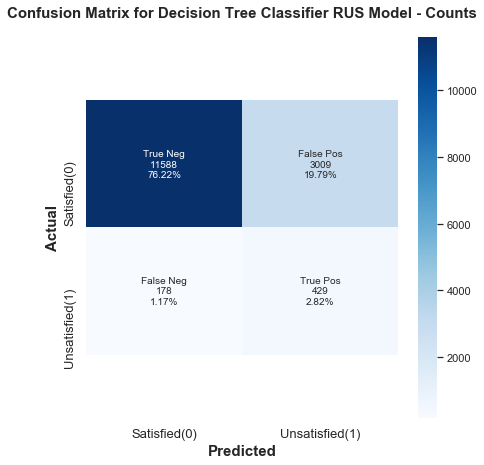

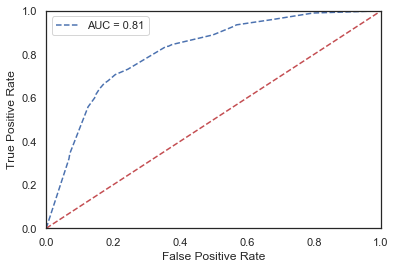

In [78]:
#Train the model with best parameters

best_dt_model_rus = DecisionTreeClassifier(
                                       criterion= grid_search_cv_rus.best_estimator_.get_params()['criterion'], 
                                       max_depth= grid_search_cv_rus.best_estimator_.get_params()['max_depth'], 
                                       max_leaf_nodes= grid_search_cv_rus.best_estimator_.get_params()['max_leaf_nodes'], 
                                       min_samples_split= grid_search_cv_rus.best_estimator_.get_params()['min_samples_split'], 
                                       random_state = 42, 
                                       )

best_dt_model_rus.fit(X_resampled_rus, y_resampled_rus)

pred = best_dt_model_rus.predict(X_test)

con_matrix_and_clas_report(y_test, pred)
plot_confusion_matrix(y_test, pred, 'Decision Tree Classifier RUS Model', cmap='Purples', cbar=False)
AUC_dt_rus = AUC_and_plot_ROC(best_dt_model_rus, X_test, y_test)

## <span style="color:red">Scores for Different Decision Tree Models</span>

In [79]:
scores_dict = {'Model_name':           ['DT Base', 'DT Base w/ best parameters', 
                                        'DT smote', 'DT smotew/ best parameters', 
                                        'DT rus', 'DT rus w/ best parameters'],
               
               'Weighted_average_F1':  [0.94, 0.94, 0.86, 0.85, 0.82, 0.85], 
               'Recall_1':             [0.03, 0.03, 0.58, 0.66, 0.68, 0.71], 
               'AUC':                  [0.69, 0.81, 0.69, 0.79, 0.70, 0.81]}

scores_df = pd.DataFrame.from_dict(scores_dict)
scores_df

,Model_name,Weighted_average_F1,Recall_1,AUC
0,DT Base,0.94,0.03,0.69
1,DT Base w/ best parameters,0.94,0.03,0.81
2,DT smote,0.86,0.58,0.69
3,DT smotew/ best parameters,0.85,0.66,0.79
4,DT rus,0.82,0.68,0.70
5,DT rus w/ best parameters,0.85,0.71,0.81


# <span style = "color:red"> **5. Conclusion** </span><a class="anchor" id="5"></a>

Jump to [Table of Contents](#0.1)

## Refererences 

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6

https://docs.google.com/document/d/15_I3GMfkcc4uUVHILAHYXImTbIGSsvWyIGkU8QJK7uc/edit?usp=sharing